## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any image into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import facial_keypoint_detecter as fkd


Importing package 'facial_keypoint_detecter'...
  + Adding module 'auxil'...
  - Done!
  + Adding module 'plots'...
  - Done!
  + Adding module 'data'...
  - Done!
  + Adding module 'model'...
  - Done!
  + Adding module 'preprocessing'...
  - Done!
Package 'facial_keypoint_detecter' imported sucessfully !!
version 1.0.0



#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

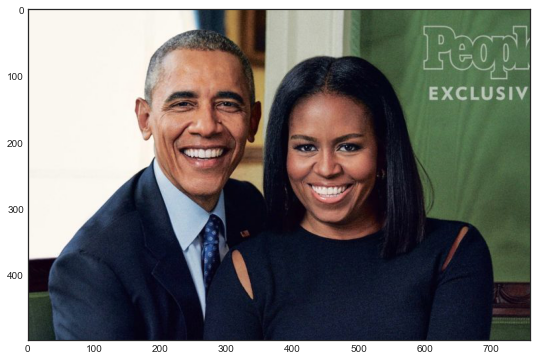

In [2]:
import cv2
# load in color image for face detection
# image = cv2.imread('auxil/images/obamas.jpg')
image = mpimg.imread('auxil/images/obamas.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='auxil/images/haar_cascade_ex.png' width=80% height=80%/>


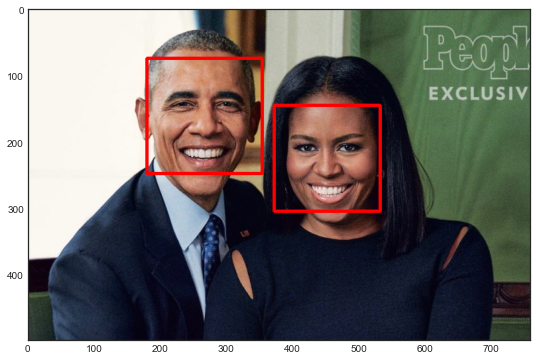

In [3]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('auxil/detector_architectures/haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, scaleFactor=1.2, minNeighbors=1)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [4]:
import torch
# from models import Net

net = fkd.model.Net()

## TODO: load the best saved model parameters (by your path name)
## You'll need to un-comment the line below and add the correct name for *your* saved model
net.load_state_dict(torch.load('saved_models/20221030_22_3con_1fc_30epoch_batchSize10_working.pt'))

## print out your net and prepare it for testing (uncomment the line below)
net.eval()

Net(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc): Linear(in_features=86528, out_features=136, bias=True)
)

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you'll wrap that Tensor in a Variable() and can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='auxil/images/michelle_detected.png' width=30% height=30%/>


In [5]:
faces

array([[179,  74, 174, 174],
       [371, 145, 160, 160]])

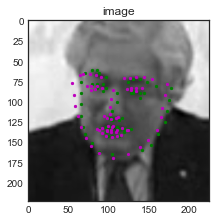

In [10]:
item = fkd.data.datasets.test.preprocessed[0]
im   = item["image"]
gts  = item["keypoints"]
out  = net.forward(im)
fkd.plots.plot_output(im, out, keypoints_gts = gts)

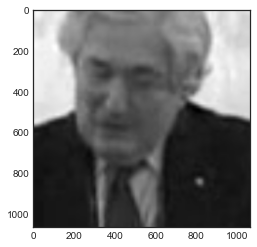

In [11]:
import matplotlib.image as mpimg
# image_test     = cv2.imread('auxil/images/test.png')
image_test     = mpimg.imread('auxil/images/test.png')
image_test_rgb = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)
plt.imshow(image_test_rgb)

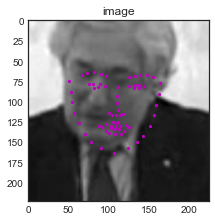

In [12]:
roi = image_test
roi = cv2.resize(roi, (224, 224))

## TODO: Convert the face region from RGB to grayscale
roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
roi = (roi / 255.0).astype(np.float32)

## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
if len(roi.shape) == 2:
    roi = roi.reshape(roi.shape[0], roi.shape[1], 1)
image_transposed = roi.transpose((2, 0, 1))

roi = torch.from_numpy(image_transposed)

images.append(roi)
output_pts = net.forward(roi)
fkd.plots.plot_output(roi, output_pts)

[[[251 248 241]
  [251 248 241]
  [250 247 240]
  ...
  [184 187 170]
  [182 185 168]
  [180 183 166]]

 [[251 248 241]
  [251 248 241]
  [250 247 240]
  ...
  [182 185 168]
  [180 183 166]
  [179 182 165]]

 [[251 248 241]
  [251 248 241]
  [250 247 240]
  ...
  [179 182 165]
  [178 181 164]
  [178 181 164]]

 ...

 [[ 51  68  98]
  [ 53  70  98]
  [ 53  70  98]
  ...
  [ 11   6  12]
  [ 11   6  12]
  [ 10   5  11]]

 [[ 57  74 102]
  [ 54  71  99]
  [ 52  69  95]
  ...
  [ 10   3  10]
  [  9   4  10]
  [  9   4  10]]

 [[ 51  71  98]
  [ 52  69  95]
  [ 50  67  93]
  ...
  [ 10   3  10]
  [ 10   3  11]
  [ 10   3  11]]]
[[[ 80  57  43]
  [ 74  50  38]
  [ 60  38  25]
  ...
  [ 83 119  83]
  [ 84 120  82]
  [ 83 119  81]]

 [[ 75  46  32]
  [ 70  42  28]
  [ 66  43  29]
  ...
  [ 90 120  82]
  [ 92 122  84]
  [ 87 117  79]]

 [[ 69  40  26]
  [ 64  36  22]
  [ 63  40  26]
  ...
  [ 88 118  80]
  [ 90 120  82]
  [ 85 115  77]]

 ...

 [[  3   4  25]
  [  5   7  28]
  [ 10  12  33]
  ..

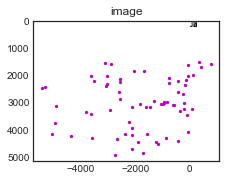

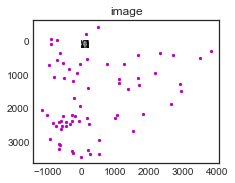

In [53]:
net.load_state_dict(torch.load('saved_models/20221030_23_3con_1fc_15epoch_batchSize20_working.pt'))
## print out your net and prepare it for testing (uncomment the line below)
net.eval()

image_copy = np.copy(image)

#Including a padding to extract face as  HAAR classifier's bounding box, crops sections of the face
PADDING = 50
images, keypoints = [], []

# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:
    
    # Select the region of interest that is the face in the image 
    roi = image_copy[y-PADDING:y+h+PADDING, x-PADDING:x+w+PADDING]
    print(roi)
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    roi = cv2.resize(roi, (224, 224))
    
    ## TODO: Convert the face region from RGB to grayscale
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi = (roi / 255.0).astype(np.float32)
#     roi = roi.astype(np.float32)
#     roi = (roi * 255.0).astype(np.float32)
    
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    if len(roi.shape) == 2:
        roi = roi.reshape(roi.shape[0], roi.shape[1], 1)
    roi_transposed = roi.transpose((2, 0, 1))
    
    roi = torch.from_numpy(roi_transposed)
    images.append(roi)
#     roi = im
    output_pts = net.forward(roi)
    keypoints.append(output_pts)

## TODO: Display each detected face and the corresponding keypoints        
# show_all_keypoints(images, keypoints)
fkd.plots.plot_output(images[0], keypoints[0])
fkd.plots.plot_output(images[1], keypoints[1])


In [38]:
images[0]

tensor([[[0.9725, 0.9725, 0.9686,  ..., 0.7059, 0.7137, 0.7059],
         [0.9725, 0.9686, 0.9686,  ..., 0.7020, 0.7059, 0.7020],
         [0.9686, 0.9686, 0.9686,  ..., 0.6941, 0.6980, 0.6980],
         ...,
         [0.2706, 0.2745, 0.2706,  ..., 0.0275, 0.0275, 0.0275],
         [0.2745, 0.2667, 0.2667,  ..., 0.0235, 0.0275, 0.0235],
         [0.2667, 0.2588, 0.2588,  ..., 0.0235, 0.0235, 0.0235]]])

In [21]:
image_cv2   = cv2.imread('auxil/images/test.png')
image_mpimg = mpimg.imread('auxil/images/test.png')

In [22]:
image_cv2

array([[[198, 198, 198],
        [207, 207, 207],
        [209, 209, 209],
        ...,
        [213, 213, 213],
        [213, 213, 213],
        [207, 207, 207]],

       [[217, 217, 217],
        [228, 228, 228],
        [230, 230, 230],
        ...,
        [234, 234, 234],
        [234, 234, 234],
        [227, 227, 227]],

       [[220, 220, 220],
        [231, 231, 231],
        [232, 232, 232],
        ...,
        [236, 236, 236],
        [237, 237, 237],
        [229, 229, 229]],

       ...,

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [ 15,  15,  15],
        [ 15,  15,  15],
        [ 16,  16,  16]],

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [ 15,  15,  15],
        [ 15,  15,  15],
        [ 16,  16,  16]],

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [ 16,  16,  16],
        [ 16,  16,  16],
        [ 17,  17,  17]]

In [25]:
image_mpimg

array([[[0.7764706 , 0.7764706 , 0.7764706 , 1.        ],
        [0.8117647 , 0.8117647 , 0.8117647 , 1.        ],
        [0.81960785, 0.81960785, 0.81960785, 1.        ],
        ...,
        [0.8352941 , 0.8352941 , 0.8352941 , 1.        ],
        [0.8352941 , 0.8352941 , 0.8352941 , 1.        ],
        [0.8117647 , 0.8117647 , 0.8117647 , 1.        ]],

       [[0.8509804 , 0.8509804 , 0.8509804 , 1.        ],
        [0.89411765, 0.89411765, 0.89411765, 1.        ],
        [0.9019608 , 0.9019608 , 0.9019608 , 1.        ],
        ...,
        [0.91764706, 0.91764706, 0.91764706, 1.        ],
        [0.91764706, 0.91764706, 0.91764706, 1.        ],
        [0.8901961 , 0.8901961 , 0.8901961 , 1.        ]],

       [[0.8627451 , 0.8627451 , 0.8627451 , 1.        ],
        [0.90588236, 0.90588236, 0.90588236, 1.        ],
        [0.9098039 , 0.9098039 , 0.9098039 , 1.        ],
        ...,
        [0.9254902 , 0.9254902 , 0.9254902 , 1.        ],
        [0.92941177, 0.929411